In [18]:
try:
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)

  FOLDERNAME = 'INDENG_235/Project'
  %cd /content/gdrive/My\ Drive/$FOLDERNAME
except ImportError:
  FOLDERNAME = "Data"

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.init as init
from math import log10
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from PIL import Image, ImageFilter
from os import listdir
from os.path import join
from scipy.io import loadmat
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [20]:
# Parameters
BATCH_SIZE = 32
NUM_WORKERS = 0 # on Windows, set this variable to 0
nb_epochs = 1
cuda = True

device = torch.device("cuda:0" if (torch.cuda.is_available() and cuda) else "cpu")
print(f"Using device: {device}")
torch.manual_seed(0)
torch.cuda.manual_seed(0)

Using device: cuda:0


In [21]:
class GeoGuesserDataset(Dataset):
    def __init__(self, images, labels):
        super(GeoGuesserDataset, self).__init__()
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]
        label = self.labels[index]

        return image, label

In [50]:
transform = transforms.Compose([
                    transforms.Resize((600, 600), Image.BICUBIC),
                    transforms.CenterCrop((570, 570)),
                    transforms.ToTensor()
    ])
train_dataset = datasets.ImageFolder(root='Data/train', transform=transform)
test_dataset = datasets.ImageFolder(root='Data/train', transform=transforms.Compose([transforms.Resize((512, 512), Image.BICUBIC), transforms.ToTensor()]))
#train_dataset = GeoGuesserDataset(train_images, train_labels)
#test_dataset = GeoGuesserDataset(test_images, test_labels)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
print("shuffled train")
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
print("shuffled test")

C:\Users\noame\AppData\Local\Temp/ipykernel_21644/3239782590.py:2: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  transforms.Resize((600, 600), Image.BICUBIC),
C:\Users\noame\AppData\Local\Temp/ipykernel_21644/3239782590.py:7: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  test_dataset = datasets.ImageFolder(root='Data/train', transform=transforms.Compose([transforms.Resize((512, 512), Image.BICUBIC), transforms.ToTensor()]))


shuffled train
shuffled test


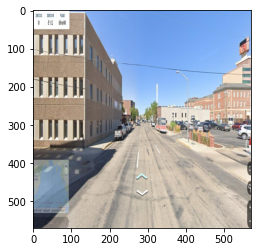

In [51]:
images, labels = next(iter(train_loader))

# Select the first image and label from the batch
image, label = images[0], labels[0]
np_image = image.numpy()

# Transpose the NumPy array for unnormalization (C, H, W) -> (H, W, C)
np_image = np.transpose(np_image, (1, 2, 0))

plt.imshow(np_image)
